# View Dark and master of CTIO Data
==================================================================================================

- author : Sylvie Dagoret-Campagne
- date   : November 15th 2016

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from astropy.modeling import models
from astropy import units as u
from astropy import nddata
from astropy.io import fits
import re
import os

In [19]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 8),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [20]:
rootpath_rawimage='../../CTIOData2016/August2016/Data/'

In [21]:
filenames= ['master_dark_n1.fits','masterflat_gband.fits', 'masterflat_iband.fits', 'masterflat_rband.fits','masterflat_zband.fits']

### View the Master Dark
==========================

In [22]:
fullfilename=os.path.join(rootpath_rawimage,filenames[0])

In [23]:
hdu_list=fits.open(fullfilename)

In [24]:
image_data = hdu_list[0].data

In [25]:
image_data.shape

(2048, 2048)

In [26]:
image_flat=image_data.flatten()

In [27]:
image_sel=image_flat[image_flat<100]

In [28]:
stat_mean=image_sel.mean()
stat_rms=image_sel.std()

### Histograms of darks

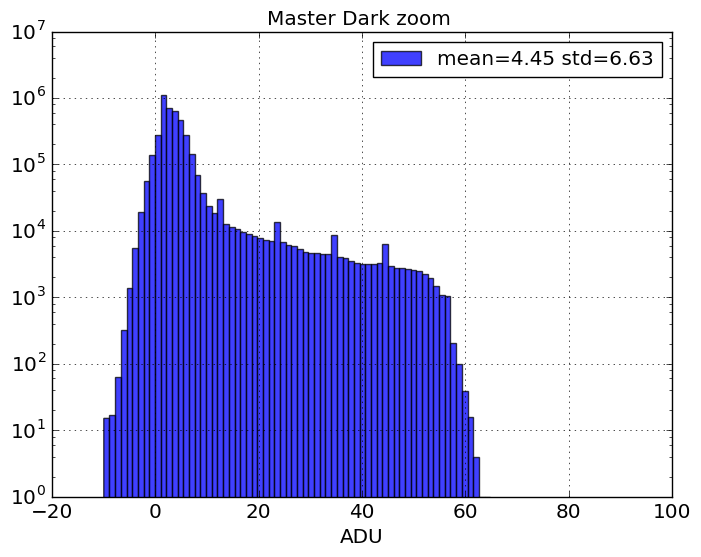

In [29]:
title='Master Dark zoom ';
legtitle='mean={:4.2f} std={:4.2f}'.format(stat_mean,stat_rms)
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
plt.hist(image_flat,bins=100,range=(-10,100),facecolor='blue', alpha=0.75,label=legtitle);
ax.set_title(title) ; ax.set_xlabel('ADU'); ax.grid(True); ax.legend(loc='best')
plt.yscale('log')
plt.show()

### Plots for Darks

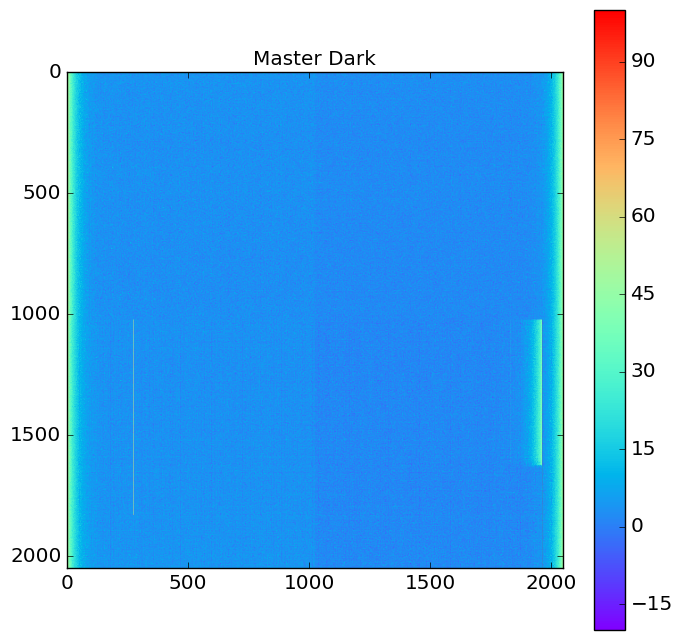

In [30]:
title='Master Dark';
im=plt.imshow(image_data,cmap='rainbow',vmin=-20,vmax=100)
plt.colorbar(im)
plt.title(title)

## View Master Flat 
=========================

In [31]:
all_flatsfiles = []
for index in np.arange(1,5):
    fullfilename=os.path.join(rootpath_rawimage,filenames[index])
    all_flatsfiles.append(fullfilename)

#### read all flats

In [32]:
all_flats = []
all_flats_title=['Flat Filter G ','Flat Filter I ','Flat Filter R ','Flat Filter Z ' ]
for file in all_flatsfiles:
    hdu_list=fits.open(file)
    image_data = hdu_list[0].data
    all_flats.append(image_data)

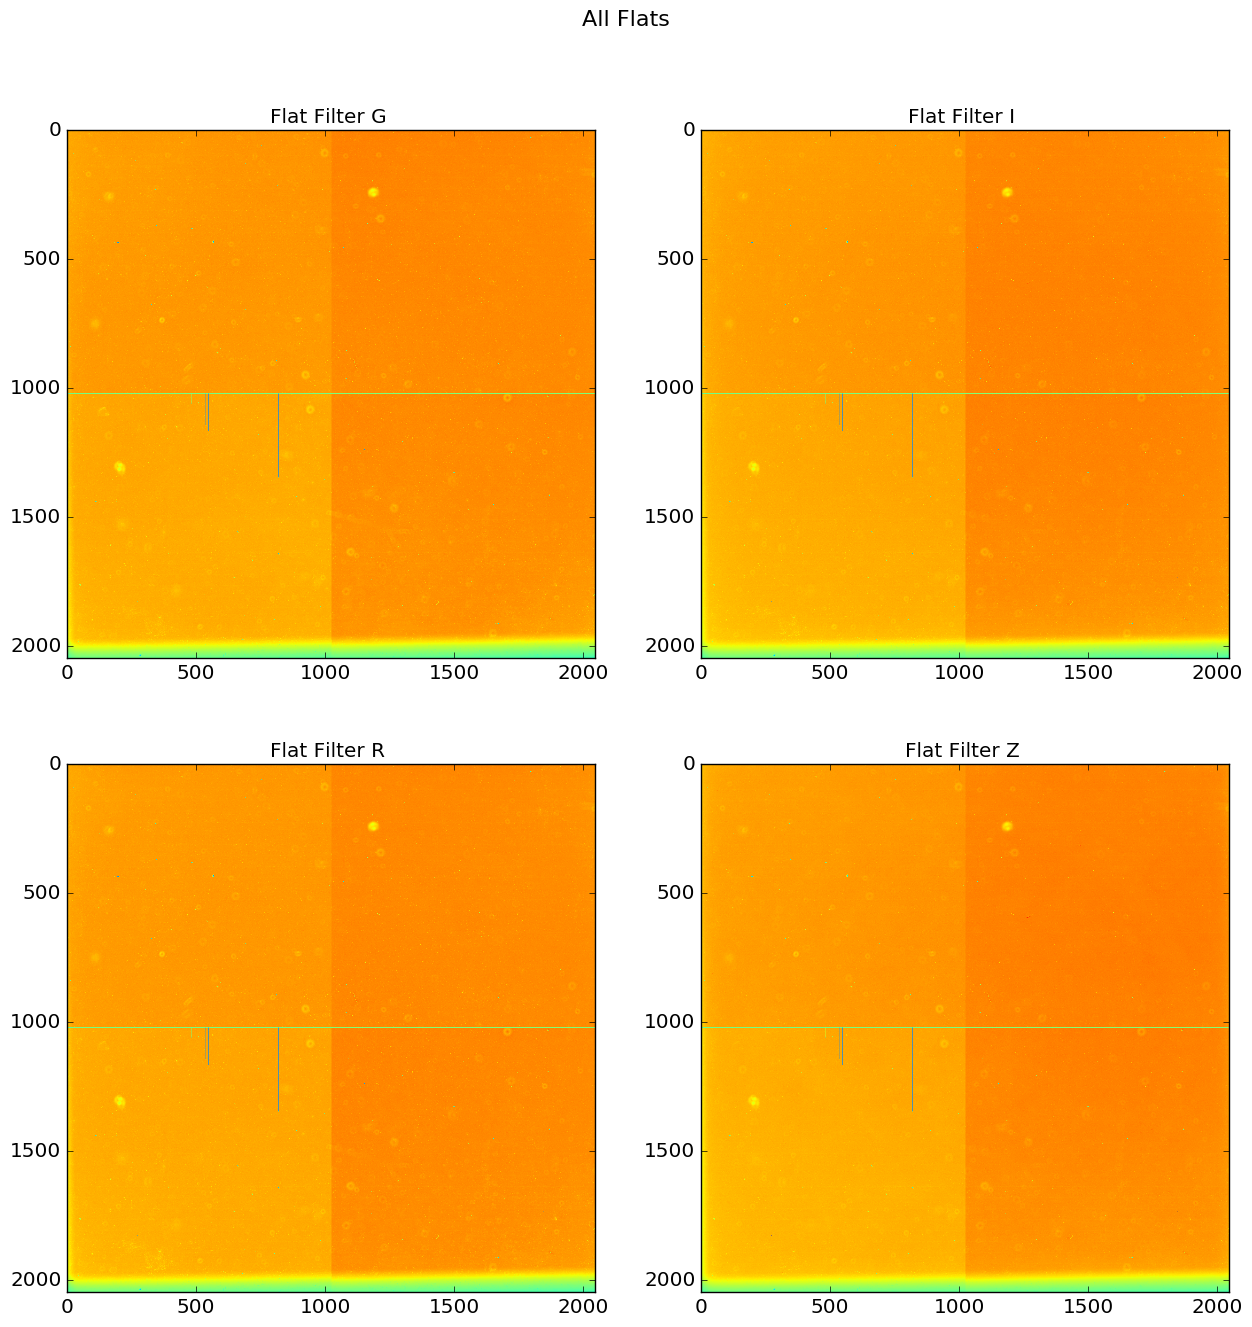

In [33]:
f, axarr = plt.subplots(2,2,figsize=(15,15))
for index in np.arange(0,4):
    ix=index%2
    iy=index/2
    im=axarr[iy,ix].imshow(all_flats[index],vmin=-0.5,vmax=1.5)
    axarr[iy,ix].set_title(all_flats_title[index])
title='All Flats '
plt.suptitle(title,size=16)        

mean=0.982 std=0.084
mean=0.984 std=0.086
mean=0.984 std=0.083
mean=0.985 std=0.087


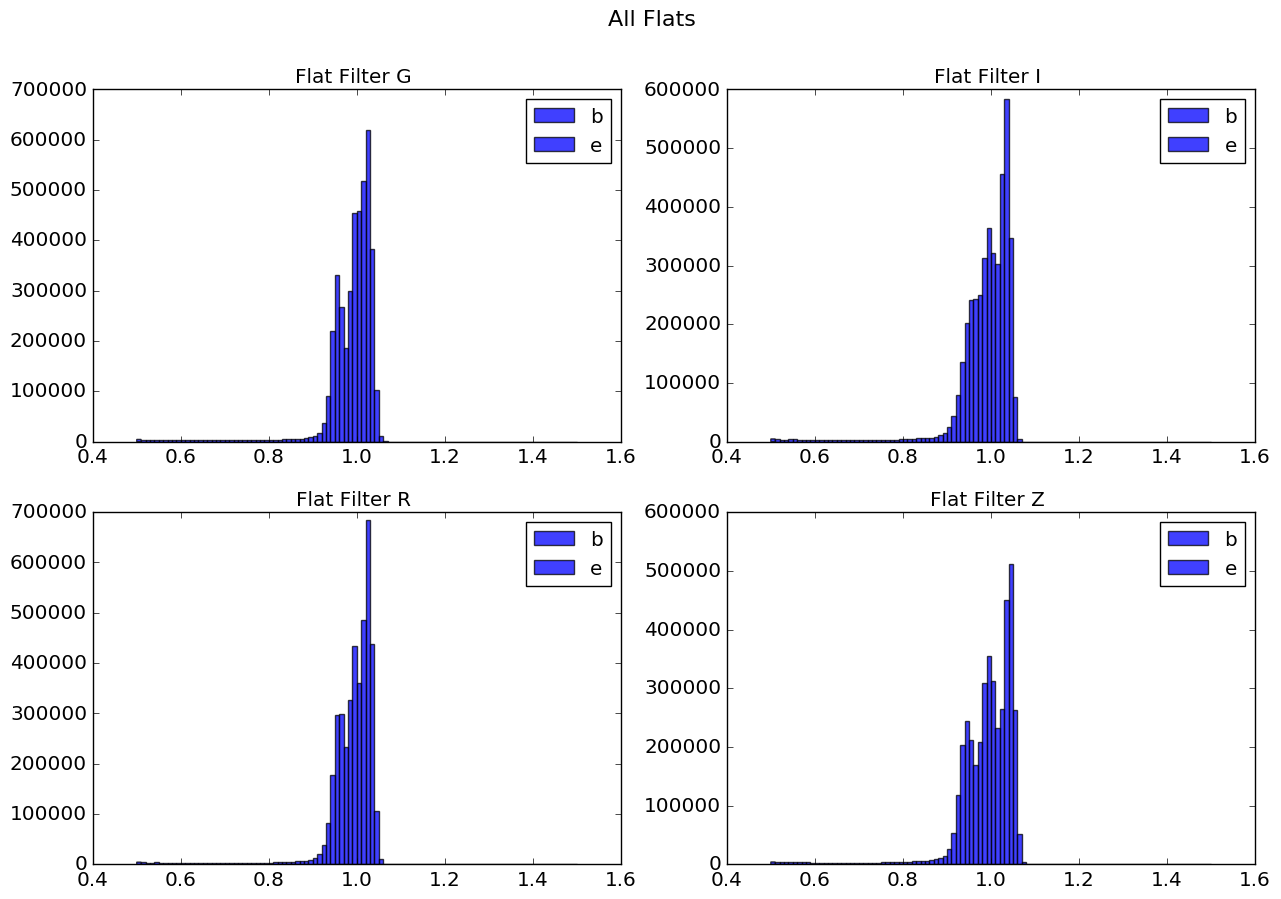

In [34]:
f, axarr = plt.subplots(2,2,figsize=(15,10))
for index in np.arange(0,4):
    ix=index%2
    iy=index/2
    hist_data=all_flats[index].flatten()
    stat_mean=hist_data.mean()
    stat_rms=hist_data.std()
    legtitle="mean={:5.3f} std={:5.3f}".format(stat_mean,stat_rms)
    print legtitle
    axarr[iy,ix].hist(hist_data,bins=100,range=(0.5,1.5),facecolor='blue', alpha=0.75,label=legtitle);
    axarr[iy,ix].set_title(all_flats_title[index])
    axarr[iy,ix].legend('best')
    
title='All Flats '
plt.suptitle(title,size=16)        